In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[2]
Points_equipe = main_path+open_folder[3]
Teams_puissance = main_path+open_folder[5]

In [4]:
train_csv = pd.read_csv(Data_base_learning,sep=";",encoding="utf-8")
train_csv

,Unnamed: 0,puissance_homeTeam,puissance_awayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,score
0,0,2409,6154,-1,-1,-1,-1,2.0
1,1,4008,3054,-1,-1,-1,-1,2.0
2,2,3029,100,-1,-1,-1,-1,2.0
3,3,2803,2045,-1,-1,-1,-1,1.0
4,4,2156,1065,-1,-1,-1,-1,0.0
...,...,...,...,...,...,...,...,...
1286,1714,6154,9319,1,2,0,0,1.0
1287,1715,9770,7928,0,4,0,0,2.0
1288,1716,9221,6821,1,0,0,0,1.0
1289,1717,9495,7276,2,2,0,0,1.0


In [5]:
X = train_csv.drop(['score'],axis=1).values
X = X[:,1:]
Y = train_csv['score'].values
Y

array([2., 2., 2., ..., 1., 1., 2.])

In [6]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032,)


In [7]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [8]:
# for row in y_train:
#      print(row)

In [9]:
def create_model():
    
    model = Sequential()
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(3, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [10]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=50,epochs=500)

Train on 1032 samples, validate on 259 samples
Epoch 1/500
1032/1032 [==============================] - 0s 40us/sample - loss: 1.0155 - accuracy: 0.5010 - val_loss: 0.9718 - val_accuracy: 0.5946
Epoch 2/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0148 - accuracy: 0.5000 - val_loss: 0.9706 - val_accuracy: 0.5946
Epoch 3/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0151 - accuracy: 0.5000 - val_loss: 0.9716 - val_accuracy: 0.5946
Epoch 4/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0151 - accuracy: 0.5019 - val_loss: 0.9711 - val_accuracy: 0.5985
Epoch 5/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0156 - accuracy: 0.5010 - val_loss: 0.9716 - val_accuracy: 0.5946
Epoch 6/500
1032/1032 [==============================] - 0s 40us/sample - loss: 1.0150 - accuracy: 0.5019 - val_loss: 0.9712 - val_accuracy: 0.5985
Epoch 7/500
1032/1032 [==============================] - 0s 40us/

Epoch 56/500
1032/1032 [==============================] - 0s 45us/sample - loss: 1.0164 - accuracy: 0.5000 - val_loss: 0.9719 - val_accuracy: 0.5946
Epoch 57/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0160 - accuracy: 0.4981 - val_loss: 0.9710 - val_accuracy: 0.5985
Epoch 58/500
1032/1032 [==============================] - 0s 35us/sample - loss: 1.0157 - accuracy: 0.4990 - val_loss: 0.9720 - val_accuracy: 0.5985
Epoch 59/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0154 - accuracy: 0.5019 - val_loss: 0.9716 - val_accuracy: 0.5946
Epoch 60/500
1032/1032 [==============================] - 0s 35us/sample - loss: 1.0158 - accuracy: 0.5039 - val_loss: 0.9715 - val_accuracy: 0.5985
Epoch 61/500
1032/1032 [==============================] - 0s 35us/sample - loss: 1.0149 - accuracy: 0.5039 - val_loss: 0.9714 - val_accuracy: 0.5985
Epoch 62/500
1032/1032 [==============================] - 0s 35us/sample - loss: 1.0156 - accuracy: 0.5010

Epoch 111/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0146 - accuracy: 0.5010 - val_loss: 0.9722 - val_accuracy: 0.5946
Epoch 112/500
1032/1032 [==============================] - 0s 35us/sample - loss: 1.0148 - accuracy: 0.5019 - val_loss: 0.9722 - val_accuracy: 0.5985
Epoch 113/500
1032/1032 [==============================] - 0s 38us/sample - loss: 1.0153 - accuracy: 0.5029 - val_loss: 0.9707 - val_accuracy: 0.5985
Epoch 114/500
1032/1032 [==============================] - 0s 38us/sample - loss: 1.0164 - accuracy: 0.5029 - val_loss: 0.9708 - val_accuracy: 0.5985
Epoch 115/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0149 - accuracy: 0.5000 - val_loss: 0.9710 - val_accuracy: 0.5985
Epoch 116/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0155 - accuracy: 0.4990 - val_loss: 0.9728 - val_accuracy: 0.5946
Epoch 117/500
1032/1032 [==============================] - 0s 37us/sample - loss: 1.0176 - accuracy:

1032/1032 [==============================] - 0s 36us/sample - loss: 1.0156 - accuracy: 0.5010 - val_loss: 0.9720 - val_accuracy: 0.5946
Epoch 166/500
1032/1032 [==============================] - 0s 42us/sample - loss: 1.0150 - accuracy: 0.5019 - val_loss: 0.9708 - val_accuracy: 0.5985
Epoch 167/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0167 - accuracy: 0.5029 - val_loss: 0.9715 - val_accuracy: 0.5985
Epoch 168/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0185 - accuracy: 0.4990 - val_loss: 0.9720 - val_accuracy: 0.5946
Epoch 169/500
1032/1032 [==============================] - 0s 35us/sample - loss: 1.0157 - accuracy: 0.5000 - val_loss: 0.9718 - val_accuracy: 0.5985
Epoch 170/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0157 - accuracy: 0.5039 - val_loss: 0.9722 - val_accuracy: 0.5985
Epoch 171/500
1032/1032 [==============================] - 0s 38us/sample - loss: 1.0151 - accuracy: 0.5019 - val_

Epoch 220/500
1032/1032 [==============================] - 0s 37us/sample - loss: 1.0166 - accuracy: 0.4981 - val_loss: 0.9731 - val_accuracy: 0.5985
Epoch 221/500
1032/1032 [==============================] - 0s 38us/sample - loss: 1.0170 - accuracy: 0.5039 - val_loss: 0.9717 - val_accuracy: 0.6023
Epoch 222/500
1032/1032 [==============================] - 0s 40us/sample - loss: 1.0154 - accuracy: 0.5010 - val_loss: 0.9705 - val_accuracy: 0.6023
Epoch 223/500
1032/1032 [==============================] - 0s 44us/sample - loss: 1.0150 - accuracy: 0.4990 - val_loss: 0.9738 - val_accuracy: 0.5946
Epoch 224/500
1032/1032 [==============================] - 0s 40us/sample - loss: 1.0147 - accuracy: 0.5029 - val_loss: 0.9715 - val_accuracy: 0.5985
Epoch 225/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0143 - accuracy: 0.5000 - val_loss: 0.9720 - val_accuracy: 0.5946
Epoch 226/500
1032/1032 [==============================] - 0s 60us/sample - loss: 1.0150 - accuracy:

1032/1032 [==============================] - 0s 41us/sample - loss: 1.0149 - accuracy: 0.5010 - val_loss: 0.9725 - val_accuracy: 0.5946
Epoch 275/500
1032/1032 [==============================] - 0s 41us/sample - loss: 1.0146 - accuracy: 0.5010 - val_loss: 0.9724 - val_accuracy: 0.5946
Epoch 276/500
1032/1032 [==============================] - 0s 43us/sample - loss: 1.0149 - accuracy: 0.5039 - val_loss: 0.9717 - val_accuracy: 0.5985
Epoch 277/500
1032/1032 [==============================] - 0s 40us/sample - loss: 1.0153 - accuracy: 0.5019 - val_loss: 0.9708 - val_accuracy: 0.6023
Epoch 278/500
1032/1032 [==============================] - 0s 75us/sample - loss: 1.0149 - accuracy: 0.5029 - val_loss: 0.9712 - val_accuracy: 0.5946
Epoch 279/500
1032/1032 [==============================] - 0s 42us/sample - loss: 1.0147 - accuracy: 0.5029 - val_loss: 0.9717 - val_accuracy: 0.5946
Epoch 280/500
1032/1032 [==============================] - 0s 37us/sample - loss: 1.0149 - accuracy: 0.4990 - val_

Epoch 329/500
1032/1032 [==============================] - 0s 34us/sample - loss: 1.0145 - accuracy: 0.5019 - val_loss: 0.9718 - val_accuracy: 0.5985
Epoch 330/500
1032/1032 [==============================] - 0s 51us/sample - loss: 1.0172 - accuracy: 0.4990 - val_loss: 0.9746 - val_accuracy: 0.5946
Epoch 331/500
1032/1032 [==============================] - 0s 43us/sample - loss: 1.0157 - accuracy: 0.5029 - val_loss: 0.9710 - val_accuracy: 0.5869
Epoch 332/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0160 - accuracy: 0.5039 - val_loss: 0.9734 - val_accuracy: 0.5946
Epoch 333/500
1032/1032 [==============================] - 0s 33us/sample - loss: 1.0148 - accuracy: 0.5010 - val_loss: 0.9719 - val_accuracy: 0.5985
Epoch 334/500
1032/1032 [==============================] - 0s 33us/sample - loss: 1.0158 - accuracy: 0.5029 - val_loss: 0.9747 - val_accuracy: 0.5946
Epoch 335/500
1032/1032 [==============================] - 0s 40us/sample - loss: 1.0155 - accuracy:

1032/1032 [==============================] - 0s 37us/sample - loss: 1.0156 - accuracy: 0.5039 - val_loss: 0.9724 - val_accuracy: 0.5946
Epoch 384/500
1032/1032 [==============================] - 0s 39us/sample - loss: 1.0144 - accuracy: 0.5019 - val_loss: 0.9723 - val_accuracy: 0.5985
Epoch 385/500
1032/1032 [==============================] - 0s 34us/sample - loss: 1.0165 - accuracy: 0.4981 - val_loss: 0.9723 - val_accuracy: 0.5985
Epoch 386/500
1032/1032 [==============================] - 0s 55us/sample - loss: 1.0163 - accuracy: 0.5010 - val_loss: 0.9713 - val_accuracy: 0.5946
Epoch 387/500
1032/1032 [==============================] - 0s 48us/sample - loss: 1.0167 - accuracy: 0.5029 - val_loss: 0.9736 - val_accuracy: 0.5946
Epoch 388/500
1032/1032 [==============================] - 0s 38us/sample - loss: 1.0151 - accuracy: 0.5019 - val_loss: 0.9705 - val_accuracy: 0.5985
Epoch 389/500
1032/1032 [==============================] - 0s 32us/sample - loss: 1.0147 - accuracy: 0.4981 - val_

Epoch 438/500
1032/1032 [==============================] - 0s 43us/sample - loss: 1.0146 - accuracy: 0.5039 - val_loss: 0.9715 - val_accuracy: 0.5946
Epoch 439/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0151 - accuracy: 0.4990 - val_loss: 0.9712 - val_accuracy: 0.5946
Epoch 440/500
1032/1032 [==============================] - 0s 38us/sample - loss: 1.0142 - accuracy: 0.5019 - val_loss: 0.9724 - val_accuracy: 0.5946
Epoch 441/500
1032/1032 [==============================] - 0s 43us/sample - loss: 1.0147 - accuracy: 0.5087 - val_loss: 0.9710 - val_accuracy: 0.5946
Epoch 442/500
1032/1032 [==============================] - 0s 42us/sample - loss: 1.0188 - accuracy: 0.4990 - val_loss: 0.9725 - val_accuracy: 0.5946
Epoch 443/500
1032/1032 [==============================] - 0s 41us/sample - loss: 1.0167 - accuracy: 0.5039 - val_loss: 0.9714 - val_accuracy: 0.5946
Epoch 444/500
1032/1032 [==============================] - 0s 35us/sample - loss: 1.0144 - accuracy:

1032/1032 [==============================] - 0s 36us/sample - loss: 1.0138 - accuracy: 0.5039 - val_loss: 0.9704 - val_accuracy: 0.5985
Epoch 493/500
1032/1032 [==============================] - 0s 34us/sample - loss: 1.0153 - accuracy: 0.5000 - val_loss: 0.9723 - val_accuracy: 0.5946
Epoch 494/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0150 - accuracy: 0.5058 - val_loss: 0.9699 - val_accuracy: 0.5985
Epoch 495/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0146 - accuracy: 0.4990 - val_loss: 0.9729 - val_accuracy: 0.5946
Epoch 496/500
1032/1032 [==============================] - 0s 36us/sample - loss: 1.0146 - accuracy: 0.5068 - val_loss: 0.9721 - val_accuracy: 0.5946
Epoch 497/500
1032/1032 [==============================] - 0s 37us/sample - loss: 1.0146 - accuracy: 0.5039 - val_loss: 0.9711 - val_accuracy: 0.5946
Epoch 498/500
1032/1032 [==============================] - 0s 37us/sample - loss: 1.0157 - accuracy: 0.5010 - val_

Text(0, 0.5, 'Accuracy')

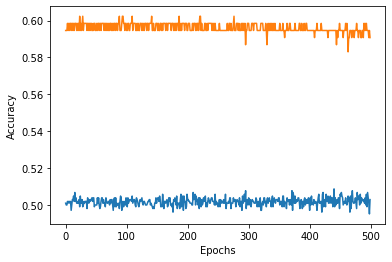

In [16]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [231]:
predictions = model.predict((x_test, y_test))

In [232]:
print(x_test[25])
print(y_test[25])
plt.show()
np.argmax(predictions[25])

[4803 7447    0    1    0    0]
2


2

# Prédiction Unique

In [235]:
puissance_homeTeam = 3029
puissance_awayTeam = 2045
win_cons_home = -1
win_cons_away = 0
lose_cons_home = 2
lose_cons_away= 1

In [237]:
predictions1 = model.predict(np.array([[puissance_homeTeam,puissance_awayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam
